In [1]:
import numpy as np
from matplotlib import pyplot as plt
from sequencer import *
import time

init_sequencer()

MUPPET1_SEQUENCER_TEST
SPI access okay


In [3]:
# this clears the working memory for pulses
clear_pulses()

set_cycle_period("1000m")

program_sequencer()

In [4]:
# disable test pulser
for i in range(4):
    disable_test_pulser(i)
    
    
# read scalers
for ch in range(4):
    print("CH{} rate: {:8.1f} Hz".format(ch,read_tdc_scaler_rate_hz(ch)))

CH0 rate:  30000.2 Hz
CH1 rate:  30003.4 Hz
CH2 rate:      0.0 Hz
CH3 rate:      0.0 Hz


In [5]:
ch = 0

reset_tdc()

enable_tdc_chan(ch)

enable_tdc()
time.sleep(0.1)
disable_tdc()


start = time.time()
block = slurp_fifo(ch)
end = time.time()
print("acquired {} words of data from fifo".format(len(block)))
print("data transfer took {:3.1f} us".format((end - start)*1e6))


leading_edges, widths = decode_block_to_pulses(block,polarity=1)

print("I got {} complete pulses with positive polarity".format(len(leading_edges)))

print("following pulse widths (ns) were recorded:")
set(np.round(widths*1e9,1))

acquired 4096 words of data from fifo
data transfer took 19806.9 us
I got 1348 complete pulses with positive polarity
following pulse widths (ns) were recorded:


{50.8, 51.2}

In [7]:
widths

array([5.08333333e-08, 5.12500000e-08, 5.08333333e-08, ...,
       5.12500000e-08, 5.08333333e-08, 5.12500000e-08])

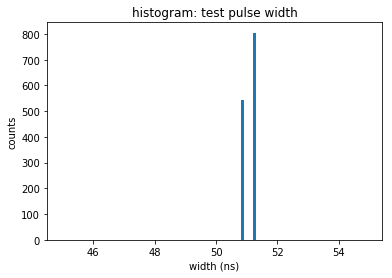

stdev: 0.204 ns


In [8]:
plt.hist(widths*1e9,bins=np.arange(45,55,0.1))
plt.title("histogram: test pulse width")
plt.xlabel("width (ns)")
plt.ylabel("counts")
plt.show()
print("stdev: {:3.3f} ns".format(np.std(widths*1e9)))

In [9]:
print("I got the following periods (in ns):")
periods = leading_edges[1:]-leading_edges[0:-1]
set([round(p,1) for p in (periods*1e9)])

I got the following periods (in ns):


{33332.9, 33333.3}

In [11]:
leading_edges

array([0.58368335, 0.58371668, 0.58375002, ..., 0.62854975, 0.62858308,
       0.62861642])

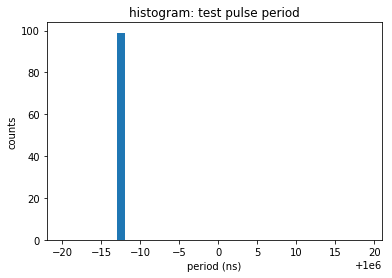

stdev: 99498743.701 ns


In [10]:
plt.hist(periods*1e9,bins=np.arange(1000000-20,1000000+20,1))
plt.title("histogram: test pulse period")
plt.xlabel("period (ns)")
plt.ylabel("counts")
plt.show()
print("stdev: {:3.3f} ns".format(np.std(periods*1e9)))